# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 65.6 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 56.3 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 8.4 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 72.9 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 42.6 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 43.1 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 45.0 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 51.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 43.6 MB/s eta 0:00:01
     |████████████████████████████████| 215 kB 43.3 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 10.5 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 46.0 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.5 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=25e288de19b15d2ee838014b5d1528db643f162bebb26a27dbbff6778a69942f
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Imports

In [3]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [4]:
!pip install --upgrade jupyter

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: jupyter in /root/.local/lib/python3.7/site-packages (1.0.0)
     |████████████████████████████████| 386 kB 1.2 MB/s eta 0:00:01
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.


## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
!pip install --upgrade ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 139 kB 1.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 10.1 MB/s eta 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.0
    Uninstalling ipywidgets-7.7.0:
      Successfully uninstalled ipywidgets-7.7.0


In [6]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [7]:
from torchvision import datasets, transforms

# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Specify the directory to save the MNIST dataset
root = './data'

# Create training set and define training data loader
trainset = datasets.MNIST(root=root, download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Create test set and define test data loader
testset = datasets.MNIST(root=root, download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [8]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

8


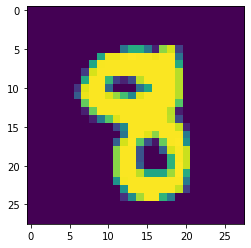

9


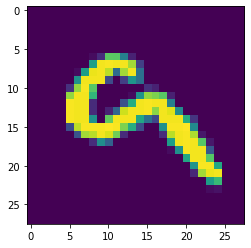

6


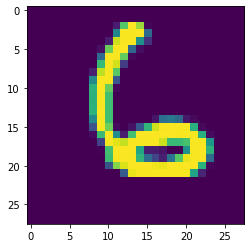

2


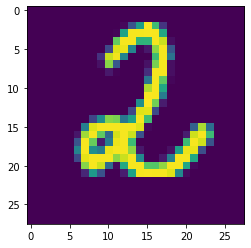

7


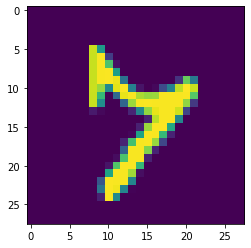

In [9]:
# Explore data
show5(trainloader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [10]:
# Define the class for your neural network
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation = F.relu
        self.layer1 = nn.Linear(784, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)

    def forward(self, x):
        x = torch.flatten(x, 1) # flatten all dimensions except batch 
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [11]:
# Instantiate the model
model = Network()

# Choose an optimizer
optimizer = optimizer = optim.Adam(model.parameters(), lr=0.001)

# Choose a loss function
criterion = nn.NLLLoss() # negative log likelihood loss (NLLLoss)


## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [12]:
# define the number of epochs
epochs = 10
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") 
model.to(device)  # Move model to the appropriate device

# Establish a list for our history
train_loss_history = []
val_loss_history = []

for epoch in range(epochs):
    model.train()
    train_loss = 0
    train_correct = 0
    
    for i, data in enumerate(trainloader):
        # data is a list of [inputs, labels]
        inputs, labels = data
        
        # Pass to GPU if available
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        # Zero out the gradients of the optimizer
        optimizer.zero_grad()
        
        # Get the outputs of your model and compute your loss
        outputs = model(inputs)
        loss = criterion(outputs, labels) ##
        
        # Compute the loss gradient using the backward method and have the optimizer take a step
        loss.backward()
        optimizer.step()

        # Compute the accuracy and print the accuracy and loss
        _, preds = torch.max(outputs.data, 1)
        train_correct += (preds == labels).float().mean().item()
        train_loss += loss.item()
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(trainloader):.2f}% training loss: {train_loss/len(trainloader):.5f}')
    train_loss_history.append(train_loss/len(trainloader))
    
    
    # The validation step
    val_loss = 0
    val_correct = 0
    model.eval()
    for inputs, labels in testloader:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
    
        outputs = model(inputs)
        loss = criterion(outputs, labels)
    
        _, preds = torch.max(outputs.data, 1)
        val_correct += (preds == labels).float().mean().item()
        val_loss += loss.item()
    print(f'Epoch {epoch + 1} validation accuracy: {val_correct/len(testloader):.2f}% validation loss: {val_loss/len(testloader):.5f}')
    val_loss_history.append(val_loss/len(testloader))
    

Epoch 1 training accuracy: 0.10% training loss: -673671397.93999
Epoch 1 validation accuracy: 0.10% validation loss: -3398876595.36306
Epoch 2 training accuracy: 0.10% training loss: -18749683312.98934
Epoch 2 validation accuracy: 0.11% validation loss: -45143599482.29299
Epoch 3 training accuracy: 0.11% training loss: -103785881163.32623
Epoch 3 validation accuracy: 0.11% validation loss: -182708881342.77707
Epoch 4 training accuracy: 0.11% training loss: -313313175110.95947
Epoch 4 validation accuracy: 0.11% validation loss: -472034797659.31207
Epoch 5 training accuracy: 0.11% training loss: -701729458468.57141
Epoch 5 validation accuracy: 0.11% validation loss: -966554884630.82800
Epoch 6 training accuracy: 0.11% training loss: -1323180995407.14722
Epoch 6 validation accuracy: 0.11% validation loss: -1720820015469.24829
Epoch 7 training accuracy: 0.11% training loss: -2233916015395.47998
Epoch 7 validation accuracy: 0.11% validation loss: -2793287415560.15283
Epoch 8 training accura

Plot the training loss (and validation loss/accuracy, if recorded).

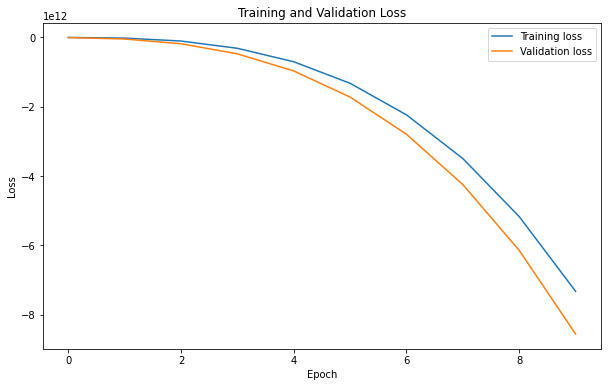

In [13]:
# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(train_loss_history, label="Training loss")
plt.plot(val_loss_history, label="Validation loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")
plt.legend()

plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [ ]:
## YOUR CODE HERE ##

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##